# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [25]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [26]:
# Shape of training and test sets
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


In [27]:
# Dimension of images
image_height = x_train.shape[1]
image_width = x_train.shape[2]
num_channels = x_train.shape[3]

print('image_height:', image_height)
print('image_width:', image_width)
print('num_channels:', num_channels)

image_height: 32
image_width: 32
num_channels: 3


In [28]:
# Number of classes
import numpy as np

classes = np.unique(y_train)
num_classes = len(classes)

print('num_classes:', num_classes)
print('unique_classes:', classes)

num_classes: 100
unique_classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


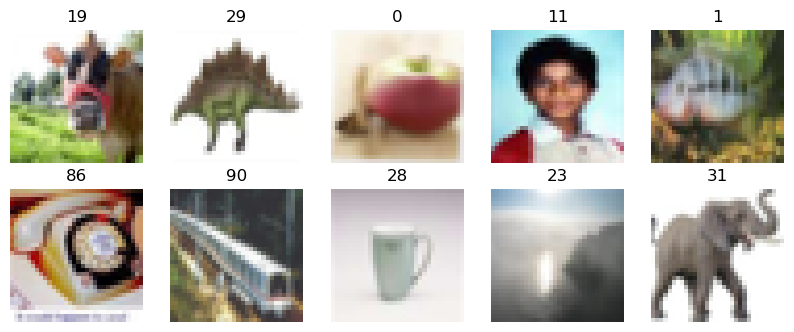

In [29]:
# Show examples from training set
import matplotlib.pyplot as plt

def show_examples(x, y, num_examples = 10):

    plt.figure(figsize=(10, 10))

    for i in range(num_examples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[i])
        plt.title(y[i][0])
        plt.axis('off')
    plt.show()

show_examples(x_train, y_train)

In [30]:
x_train.max()

255

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [31]:
# Image normalization
x_train_scaled = x_train * (1./255)
x_test_scaled = x_test * (1./255)

# Print shape and value ranges for verification
print("x_train_scaled shape:", x_train_scaled.shape)
print("x_test_scaled shape:", x_test_scaled.shape)
print("Pixel range in x_train_scaled:", x_train_scaled.min(), "to", x_train_scaled.max())
print("Pixel range in x_test_scaled:", x_test_scaled.min(), "to", x_test_scaled.max())

x_train_scaled shape: (50000, 32, 32, 3)
x_test_scaled shape: (10000, 32, 32, 3)
Pixel range in x_train_scaled: 0.0 to 1.0
Pixel range in x_test_scaled: 0.0 to 1.0


In [32]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)          # sparse_output=False: to print a dence array

# Fit and transform the training and test labels
y_train_encoded = ohe.fit_transform(y_train)
y_test_encoded = ohe.transform(y_test)

# Print the shape of the encoded labels
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

# Confirm the first encoded label
print("Sample encoded y_train[1]:", y_train_encoded[1])


y_train_encoded shape: (50000, 100)
y_test_encoded shape: (10000, 100)
Sample encoded y_train[1]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [33]:
# Split training data to training and validation sets
from sklearn.model_selection import train_test_split

# Split the data
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_scaled, y_train_encoded, test_size = 0.2, random_state = 42)

# Print shapes to verify
print("Training data shape (x):", x_train_split.shape)
print("Training labels shape (y):", y_train_split.shape)
print("Validation data shape (x):", x_val_split.shape)
print("Validation labels shape (y):", y_val_split.shape)

Training data shape (x): (40000, 32, 32, 3)
Training labels shape (y): (40000, 100)
Validation data shape (x): (10000, 32, 32, 3)
Validation labels shape (y): (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Define the first Convolutional and Maxpooling layers
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (image_height, image_width, num_channels)))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# Define the second Convolutional and Maxpooling layers
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# Flatten
model.add(Flatten())

# Define Dense layer
model.add(Dense(64, activation = 'relu'))

# Define Output layer                                                                             
model.add(Dense(num_classes, activation = 'softmax'))   

# view network architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> as we have multi-class classification, the appropriate loss function would be categorical cross entropy
- <b>Optimizer:</b> adam optimizer was selected as it lets each parameter in the network have its own learning rate that are changing independently over time. Also, gradients are updated based on the average of current and past gradients.

In [35]:
# compile network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [36]:
# Train the model
num_epochs = 10
batch_size = 32

history = model.fit(x_train_split, y_train_split, 
          validation_data = (x_val_split, y_val_split), 
          epochs = num_epochs, 
          batch_size = batch_size)

history

Epoch 1/10
1250/1250 [==============================] - 56s 44ms/step - loss: 4.1058 - accuracy: 0.0732 - val_loss: 3.8116 - val_accuracy: 0.1211
Epoch 2/10
1250/1250 [==============================] - 52s 41ms/step - loss: 3.4749 - accuracy: 0.1727 - val_loss: 3.2649 - val_accuracy: 0.2135
Epoch 3/10
1250/1250 [==============================] - 53s 42ms/step - loss: 3.1435 - accuracy: 0.2274 - val_loss: 3.1056 - val_accuracy: 0.2382
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 2.9371 - accuracy: 0.2645 - val_loss: 2.9412 - val_accuracy: 0.2671
Epoch 5/10
1250/1250 [==============================] - 63s 50ms/step - loss: 2.7848 - accuracy: 0.2917 - val_loss: 2.8660 - val_accuracy: 0.2865
Epoch 6/10
1250/1250 [==============================] - 58s 46ms/step - loss: 2.6737 - accuracy: 0.3143 - val_loss: 2.8122 - val_accuracy: 0.2958
Epoch 7/10
1250/1250 [==============================] - 57s 46ms/step - loss: 2.5825 - accuracy: 0.3294 - val_loss: 2.7770 -

First, I tried using 32 filters for Conv2D but the val_accuracy was too small. So, I increased the number of filters in both Conv layers and saw an increase in the val_accuracy showing that my model started learning.

Accuracy: 7.3% at epoch 1, improving to 37.2% by epoch 10.

Validation Accuracy: Starts at 12.1% and reaches 31.2% by epoch 10.

Loss: Decreases from 4.1 to 2.36, indicating improvement in training. Validation loss also slightly decreases from 3.8 to 2.7.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

In [37]:
# Evaluate the model on the test set
results = model.evaluate(x_test_scaled, y_test_encoded)

# Extract and print accuracy
test_loss = results[0]
test_accuracy = results[1]

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 9s 29ms/step - loss: 2.7456 - accuracy: 0.3107
Test Loss: 2.7455508708953857
Test Accuracy: 0.310699999332428


Test accuracy is 31.1% which shows the poor performance of our model in predicting accurate classes.

In [38]:
from sklearn.metrics import classification_report

# Predict class probabilities
y_pred_probs = model.predict(x_test_scaled)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.70      0.57       100
           1       0.46      0.27      0.34       100
           2       0.22      0.11      0.15       100
           3       0.19      0.07      0.10       100
           4       0.15      0.07      0.10       100
           5       0.35      0.26      0.30       100
           6       0.39      0.38      0.39       100
           7       0.42      0.36      0.39       100
           8       0.49      0.33      0.39       100
           9       0.34      0.52      0.41       100
          10       0.11      0.03      0.05       100
          11       0.22      0.13      0.16       100
          12       0.34      0.45      0.39       100
          13       0.26      0.15      0.19       100
          14       0.24      0.19      0.21       100
          15       0.22      0.12      0.15       100
  

- <b>Accuracy:</b> 31%
- <b>Other metric:</b> Precision and recall 
- <b>Reason for selection:</b> They give a deeper understanding of how well the model identifies different classes
- <b>Value of metric:</b> precision: 30% and Recall: 33%
- <b>Interpretation of metric value:</b> A precision of 0.30 means that 30% of the images that the model classified as a certain class (e.g., class 1) are actually from that class.
A recall of 0.31 means that the model correctly identified 31% of the images from the actual class.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

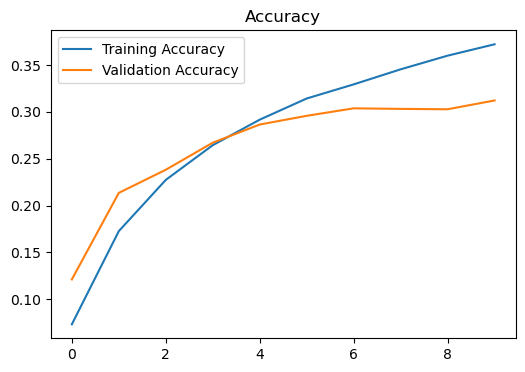

In [39]:
# plot training and validation accuracy to check for overfitting
plt.figure(figsize=(6, 4))
plt.title('Accuracy')
plt.plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()                                                                     

An increase in the gap between (training_accuracy and val_accuracy) is a sign of overfitting: model learnt perfectly from the training data but does not perform well for validation set

probability of predicted class 0.40999579429626465
probability of predicted class 0.2332356870174408
classification probability for sample correct classified image is [3.93309563e-07 4.24840022e-04 5.58153886e-07 2.45768115e-06
 1.34743232e-05 2.02404390e-05 6.09343851e-06 1.32953941e-08
 1.72247364e-05 1.33831145e-05 1.39872543e-06 1.06798034e-07
 1.07700459e-03 1.40057970e-03 1.47623155e-06 2.29129475e-03
 1.65466133e-07 4.09995794e-01 2.74013408e-04 1.75671288e-04
 1.86626603e-09 4.34793002e-09 2.83347816e-07 6.45751206e-05
 2.27192114e-08 2.83716126e-05 7.23789026e-06 2.46473565e-03
 2.52882548e-10 9.16405639e-04 7.98664189e-07 5.06547622e-05
 8.62850435e-03 1.74553394e-02 1.09781256e-04 2.60004668e-07
 4.75515881e-05 3.14474441e-02 2.87919043e-04 3.00639458e-05
 3.42949488e-06 1.87234946e-06 4.19024218e-05 5.20362073e-06
 4.25462167e-05 1.12631906e-05 4.06614305e-07 4.77897422e-03
 7.48343254e-09 1.69128269e-01 5.40656911e-05 7.70773739e-04
 6.91472786e-03 1.70512450e-07 5.2745481

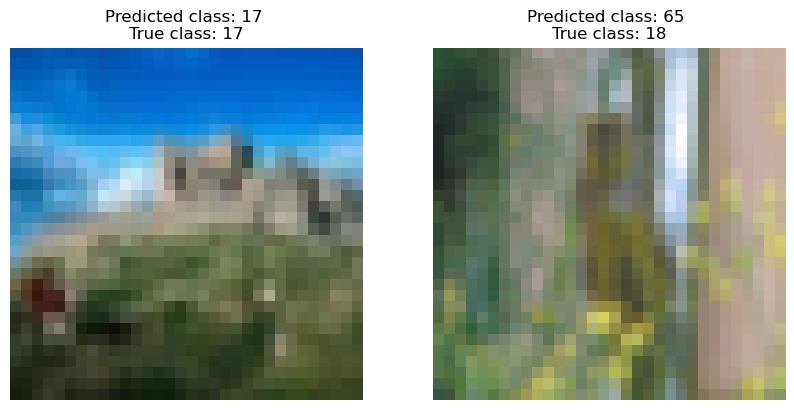

In [40]:
# Plot a correctly and an incorrectly classified image in the test set and report the model's classification probabilities for each
import random

# Find correctly and an incorrectly classified images
correct_image_idx = np.where(y_pred_classes == y_true_classes)[0]
incorrect_image_idx = np.where(y_pred_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified image
sample_correct_image_idx = random.choice(correct_image_idx)
sample_incorrect_image_idx = random.choice(incorrect_image_idx)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(x_test[sample_correct_image_idx])
plt.title(f"Predicted class: {y_pred_classes[sample_correct_image_idx]} \nTrue class: {y_true_classes[sample_correct_image_idx]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[sample_incorrect_image_idx])
plt.title(f"Predicted class: {y_pred_classes[sample_incorrect_image_idx]} \nTrue class: {y_true_classes[sample_incorrect_image_idx]}")
plt.axis('off')

# Display model's classification probabilities for each
print(f'probability of predicted class {y_pred_probs[sample_correct_image_idx][y_pred_classes[sample_correct_image_idx]]}')
print(f'probability of predicted class {y_pred_probs[sample_incorrect_image_idx][y_pred_classes[sample_incorrect_image_idx]]}')

print(f'classification probability for sample correct classified image is {y_pred_probs[sample_correct_image_idx]}')
print(f'classification probability for sample incorrect classified image is {y_pred_probs[sample_incorrect_image_idx]}')

In [41]:
# Display probabilities using more readable format
print("Probabilities for Correctly Classified Image:")
for cls, prob in enumerate(y_pred_probs[sample_correct_image_idx]):
    print(f"Class {cls}: {prob:.4f}")

print("\nProbabilities for Incorrectly Classified Image:")
for cls, prob in enumerate(y_pred_probs[sample_incorrect_image_idx]):
    print(f"Class {cls}: {prob:.4f}")

Probabilities for Correctly Classified Image:
Class 0: 0.0000
Class 1: 0.0004
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000
Class 10: 0.0000
Class 11: 0.0000
Class 12: 0.0011
Class 13: 0.0014
Class 14: 0.0000
Class 15: 0.0023
Class 16: 0.0000
Class 17: 0.4100
Class 18: 0.0003
Class 19: 0.0002
Class 20: 0.0000
Class 21: 0.0000
Class 22: 0.0000
Class 23: 0.0001
Class 24: 0.0000
Class 25: 0.0000
Class 26: 0.0000
Class 27: 0.0025
Class 28: 0.0000
Class 29: 0.0009
Class 30: 0.0000
Class 31: 0.0001
Class 32: 0.0086
Class 33: 0.0175
Class 34: 0.0001
Class 35: 0.0000
Class 36: 0.0000
Class 37: 0.0314
Class 38: 0.0003
Class 39: 0.0000
Class 40: 0.0000
Class 41: 0.0000
Class 42: 0.0000
Class 43: 0.0000
Class 44: 0.0000
Class 45: 0.0000
Class 46: 0.0000
Class 47: 0.0048
Class 48: 0.0000
Class 49: 0.1691
Class 50: 0.0001
Class 51: 0.0008
Class 52: 0.0069
Class 53: 0.0000
Class 54: 0.0000
Class 55: 0.0000
Class 56: 0.

Classification Probabilities:

Correctly Classified Image:

The model assigns the highest probability to the predicted class. Probabilities for other classes are lower.

Incorrectly Classified Image:

The model assigns the highest probability to an incorrect class, suggesting it is confident in the wrong prediction. Other class probabilities are typically lower.

For the correctly classified image, the model is relatively confident about the true class.

For the incorrectly classified image, the model might have been confused due to similar features between the predicted and true class, limited representation of the true class in the training data, ...

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [42]:
# Added 3rd Conv layer, dropout, adjusting learning rate
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout
from keras.optimizers import Adam

model = Sequential()

# Define the first Convolutional and Maxpooling layers
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (image_height, image_width, num_channels)))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# Define the second Convolutional and Maxpooling layers
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# Define the third Convolutional and Maxpooling layers
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

# Flatten
model.add(Flatten())

# Define Dense layer
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))                                 

# Define Output layer                                                                             
model.add(Dense(num_classes, activation = 'softmax'))   

# view network architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [43]:
# Define the scheduler function
def lr_schedule(epoch, lr):
    return lr * 0.9                                  # Reduce by 10% every epoch

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Use the scheduler in training
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(x_train_split, y_train_split, 
                    validation_data=(x_val_split, y_val_split), 
                    epochs=10, 
                    batch_size=32, 
                    callbacks=[lr_scheduler])

Epoch 1/10
1250/1250 [==============================] - 61s 48ms/step - loss: 4.2842 - accuracy: 0.0429 - val_loss: 3.8499 - val_accuracy: 0.1070 - lr: 9.0000e-04
Epoch 2/10
1250/1250 [==============================] - 59s 48ms/step - loss: 3.8096 - accuracy: 0.1083 - val_loss: 3.4727 - val_accuracy: 0.1776 - lr: 8.1000e-04
Epoch 3/10
1250/1250 [==============================] - 61s 49ms/step - loss: 3.5398 - accuracy: 0.1546 - val_loss: 3.2528 - val_accuracy: 0.2069 - lr: 7.2900e-04
Epoch 4/10
1250/1250 [==============================] - 63s 51ms/step - loss: 3.3593 - accuracy: 0.1839 - val_loss: 3.1438 - val_accuracy: 0.2424 - lr: 6.5610e-04
Epoch 5/10
1250/1250 [==============================] - 66s 53ms/step - loss: 3.2045 - accuracy: 0.2107 - val_loss: 2.9542 - val_accuracy: 0.2764 - lr: 5.9049e-04
Epoch 6/10
1250/1250 [==============================] - 63s 51ms/step - loss: 3.0787 - accuracy: 0.2320 - val_loss: 2.8846 - val_accuracy: 0.2862 - lr: 5.3144e-04
Epoch 7/10
1250/1250 [

313/313 [==============================] - 5s 15ms/step - loss: 2.6388 - accuracy: 0.3345
Test Loss: 2.638836622238159
Test Accuracy: 0.3345000147819519
313/313 [==============================] - 5s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       100
           1       0.37      0.53      0.44       100
           2       0.20      0.27      0.23       100
           3       0.15      0.14      0.14       100
           4       0.06      0.03      0.04       100
           5       0.26      0.31      0.29       100
           6       0.38      0.35      0.36       100
           7       0.34      0.34      0.34       100
           8       0.46      0.37      0.41       100
           9       0.39      0.43      0.41       100
          10       0.25      0.13      0.17       100
          11       0.24      0.13      0.17       100
          12       0.35      0.36      0.35       100
          1

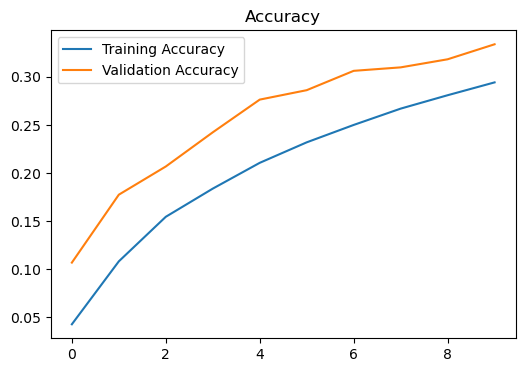

In [ ]:
# Evaluate the model on the test set
results = model.evaluate(x_test_scaled, y_test_encoded)

# Extract and print accuracy
test_loss = results[0]
test_accuracy = results[1]

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict class probabilities
y_pred_probs = model.predict(x_test_scaled)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# plot training and validation accuracy to check for overfitting
plt.figure(figsize=(6, 4))
plt.title('Accuracy')
plt.plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show() 

probability of predicted class 0.24207161366939545
probability of predicted class 0.23098930716514587
classification probability for sample correct classified image is [1.37529999e-03 3.66420791e-05 3.13702077e-02 1.09542532e-06
 1.78131714e-07 2.94659268e-02 1.37629428e-07 9.64675451e-08
 3.47764733e-08 4.35652360e-02 7.00905081e-03 4.11622077e-02
 4.74689557e-07 1.33232035e-07 4.07247580e-06 1.54886657e-05
 4.84598912e-02 1.15701837e-10 1.69803528e-07 5.70708198e-06
 6.81934655e-02 3.49440455e-07 6.26386749e-03 6.84507040e-06
 4.50075131e-05 7.02446885e-03 1.04222425e-04 2.62042583e-08
 1.36511445e-01 1.94316885e-06 3.63698585e-11 1.37749434e-09
 1.61142758e-04 9.57999813e-09 1.60308307e-04 4.93591698e-03
 2.24800664e-03 1.80840871e-08 4.57308403e-07 1.90520019e-04
 2.41081595e-01 3.12939619e-07 1.05934426e-07 2.38498706e-05
 1.11102381e-04 2.02282026e-04 2.14680266e-02 6.08428650e-07
 4.80082363e-10 5.97495209e-09 7.77931564e-05 7.55878427e-05
 1.56082854e-16 1.49602929e-04 7.498960

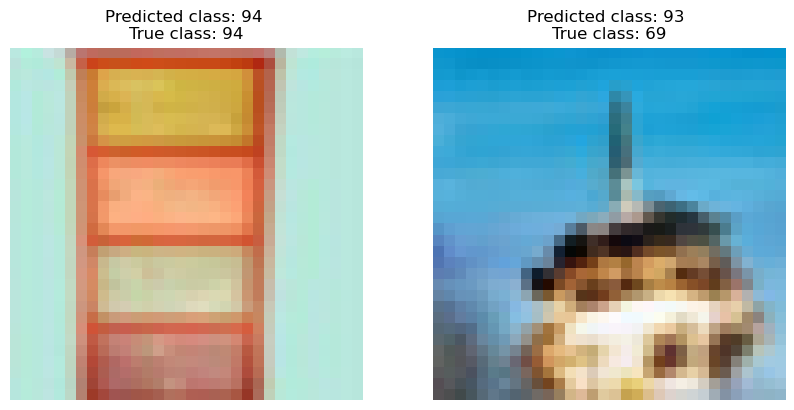

In [45]:
# Find correctly and an incorrectly classified images
correct_image_idx = np.where(y_pred_classes == y_true_classes)[0]
incorrect_image_idx = np.where(y_pred_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified image
sample_correct_image_idx = random.choice(correct_image_idx)
sample_incorrect_image_idx = random.choice(incorrect_image_idx)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(x_test[sample_correct_image_idx])
plt.title(f"Predicted class: {y_pred_classes[sample_correct_image_idx]} \nTrue class: {y_true_classes[sample_correct_image_idx]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[sample_incorrect_image_idx])
plt.title(f"Predicted class: {y_pred_classes[sample_incorrect_image_idx]} \nTrue class: {y_true_classes[sample_incorrect_image_idx]}")
plt.axis('off')

# Display model's classification probabilities for each
print(f'probability of predicted class {y_pred_probs[sample_correct_image_idx][y_pred_classes[sample_correct_image_idx]]}')
print(f'probability of predicted class {y_pred_probs[sample_incorrect_image_idx][y_pred_classes[sample_incorrect_image_idx]]}')

print(f'classification probability for sample correct classified image is {y_pred_probs[sample_correct_image_idx]}')
print(f'classification probability for sample incorrect classified image is {y_pred_probs[sample_incorrect_image_idx]}')

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.



lack of improvement in the model's performance despite adding a third convolutional layer, dropout, and adjusting the learning rate suggests that these changes did not effectively address the bottlenecks in training. 

Possible reasons for this could include:

+ Increasing the number of convolutional layers may have added complexity to the model, leading to overfitting or difficulty in optimization due to insufficient data or computational inefficiencies.

+ Dropout rate: A 0.3 dropout rate might not have been optimal. Either increasing or decreasing this rate could better balance regularization and performance.

+ Learning rate schedule: The exponential decay (reducing the learning rate by 10% per epoch) might have slowed down learning too early or failed to adapt to the optimization landscape effectively.

Suggestions for Further Improvement:

Data augmentation: Enhance diversity in training data to improve generalization.

Learning rate tuning: Experiment with different schedules or other optimizers.

Architecture changes: Test lighter or pre-trained models to evaluate performance gains.

It is better to run the experiments incrementally and analyze the impact of each change to better understand what works for the dataset.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.